In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

# Summary statistic

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [3]:
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [4]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [5]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [6]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [7]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [8]:
# accumulate sum along the column
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [9]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [10]:
import pandas_datareader.data as pdweb
import datetime

/home/vinhngo/miniconda3/envs/sp/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [11]:
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,52.416977,48.657547,33.898167
2010-01-04,53.826290,49.342556,34.588184
2010-01-05,54.207569,49.535217,34.833763
2010-01-06,54.214378,49.963345,35.015053
2010-01-07,54.010117,49.806370,35.003349


In [12]:
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Volume']

In [13]:
volume.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,4246600.0,18852300.0,1517600.0
2010-01-04,10173800.0,27809100.0,3956100.0
2010-01-05,10593700.0,30174700.0,4109600.0
2010-01-06,11014600.0,35044700.0,6227900.0
2010-01-07,9626900.0,27192100.0,4431300.0


In [14]:
rets = prices.pct_change()
rets.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.026887,0.014078,0.020356
2010-01-05,0.007084,0.003905,0.007100
2010-01-06,0.000126,0.008643,0.005204
2010-01-07,-0.003768,-0.003142,-0.000334


In [15]:
# Corr of the stock
corr = rets.corr

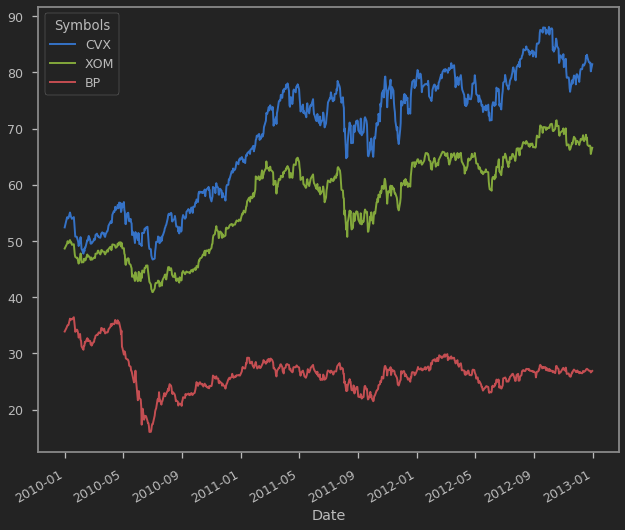

In [16]:
prices.plot()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

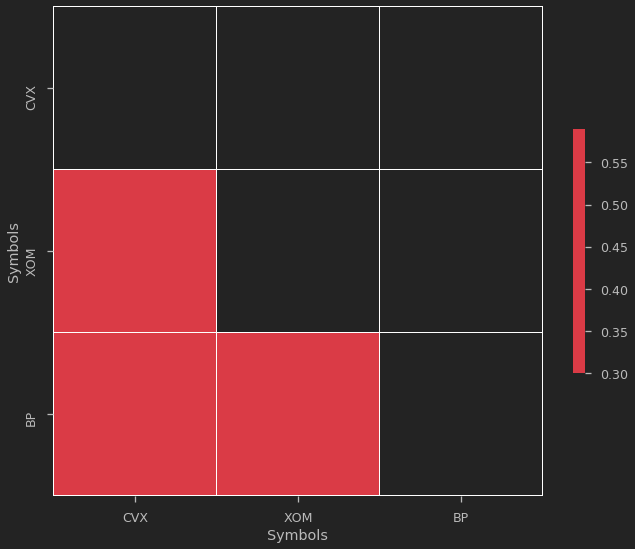

In [18]:
# sns.corrplot(rets,annot=False,diag_names=False)
mask = np.triu(np.ones_like(rets.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(rets.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
ser1 = Series(['w','w','w','x','y','z','w','x','y','z','a'])

ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [20]:
ser1.value_counts()

w    4
y    2
z    2
x    2
a    1
dtype: int64

# Missing data

In [21]:
data = Series(['one','two',np.nan,'four'])

In [22]:
data

0     one
1     two
2     NaN
3    four
dtype: object

In [23]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [24]:
data.dropna()

0     one
1     two
3    four
dtype: object

In [25]:
dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])

dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [26]:
clean_dframe = dframe.dropna()
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [27]:
dframe.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [28]:
dframe.dropna(axis=1)

""
0
1
2
3


In [29]:
na = np.nan
dframe2 = DataFrame([[1,2,3,na],[2,na,5,6],[na,7,na,9],[1,na,na,na]])

In [30]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [31]:
dframe2.dropna(thresh=2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [32]:
dframe2.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [33]:
dframe2.fillna({0:0,1:1,2:2,3:3})

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


In [34]:
dframe2.fillna(1,inplace=True)

In [35]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


# Index hierachy

In [36]:
ser = Series(np.random.randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [37]:
ser

1  a   -0.446008
   b    0.702333
   c    0.834767
2  a   -0.843863
   b    0.498222
   c   -1.136892
dtype: float64

In [38]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [39]:
ser[1]

a   -0.446008
b    0.702333
c    0.834767
dtype: float64

In [40]:
ser[:,'a']

1   -0.446008
2   -0.843863
dtype: float64

In [41]:
dframe = ser.unstack()

In [42]:
dframe

,a,b,c
1,-0.446008,0.702333,0.834767
2,-0.843863,0.498222,-1.136892


In [43]:
dframe2 = DataFrame(np.arange(16).reshape(4,4),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['NY','NY','LA','SF'],['cold','hot','cold','hot']])
dframe2

NY       LA  SF
    cold hot cold hot
a 1    0   1    2   3
  2    4   5    6   7
b 1    8   9   10  11
  2   12  13   14  15

In [44]:
dframe2.index.names = ['INDEX_1','INDEX_2']
dframe2.columns.names = ['Cities','Temp']

In [45]:
dframe2.swaplevel('Cities','Temp',axis=1)
dframe2.swaplevel(axis=0)

Cities            NY       LA  SF
Temp            cold hot cold hot
INDEX_2 INDEX_1                  
1       a          0   1    2   3
2       a          4   5    6   7
1       b          8   9   10  11
2       b         12  13   14  15

In [46]:
dframe2.sort_index(1)

Cities            LA   NY      SF
Temp            cold cold hot hot
INDEX_1 INDEX_2                  
a       1          2    0   1   3
        2          6    4   5   7
b       1         10    8   9  11
        2         14   12  13  15

In [47]:
dframe2.sort_index(0)

Cities            NY       LA  SF
Temp            cold hot cold hot
INDEX_1 INDEX_2                  
a       1          0   1    2   3
        2          4   5    6   7
b       1          8   9   10  11
        2         12  13   14  15

In [48]:
dframe2.sum(level='Cities',axis=1)

Cities           NY  LA  SF
INDEX_1 INDEX_2            
a       1         1   2   3
        2         9   6   7
b       1        17  10  11
        2        25  14  15